# Simple Linear Regression


In [8]:
# Imports
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

In [9]:
# Load the dataset
df = pd.read_csv('tvmarketing.csv')

## Linear Regression fit

#### We assume there's a linear correlation between Y and X, Y:= Sales and X:= TV(Marketing). Therefore, the relationship can be described as Y ~= beta0 + beta1 * X


In [10]:
# Calculate the number of Observations in our dataset
n = len(df['TV'])

In [11]:
# Calculate coefficients
numerator = 0
denominator = 0
for i in range(1, 200):
    numerator += (df['TV'].iloc[i] - df['TV'].mean()) * (df['Sales'].iloc[i] - df['Sales'].mean())
    denominator += (df['TV'].iloc[i] - df['TV'].mean()) ** 2

beta1 = numerator / denominator
beta0 = df['Sales'].mean() - beta1*df['TV'].mean()
print(f"Slope estimate (beta1): {beta1}")
print(f"Intercept estimate (beta0): {beta0}")

Slope estimate (beta1): 0.047301721373728386
Intercept estimate (beta0): 7.067136634903545


In [12]:
# Predict Sales using simple linear regression and coefficients beta0, and beta1
df['SalesPredicted'] = [beta1 * xi + beta0 for xi in df['TV']]
print(df['SalesPredicted'])

0      17.951263
1       9.172063
2       7.880726
3      14.233347
4      15.619288
         ...    
195     8.874062
196    11.522959
197    15.439541
198    20.481905
199    18.045866
Name: SalesPredicted, Length: 200, dtype: float64


In [13]:
# Calculate (R)MSE
SE = 0
for i in range(1, 200):
    SE += (df['Sales'].iloc[i] - df['SalesPredicted'].iloc[i]) ** 2
MSE = SE / 200
RMSE = math.sqrt(MSE)

### Model Evaluation

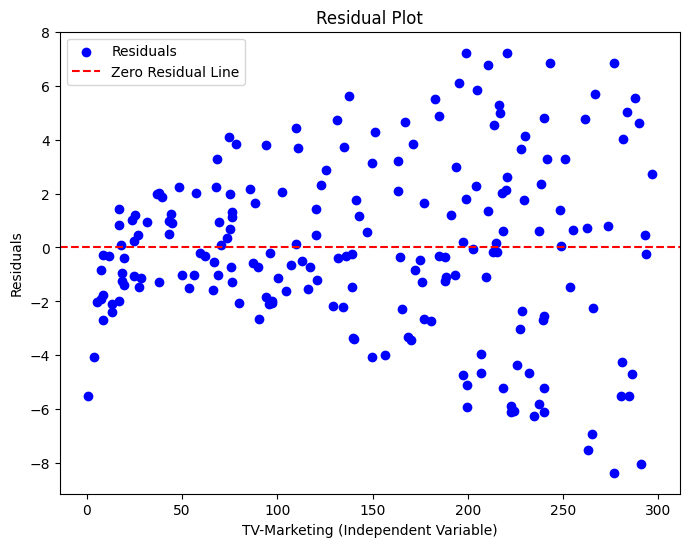

In [14]:
df['residuals'] = df['Sales'] - df['SalesPredicted']
plt.figure(figsize=(8, 6))
plt.scatter(x=df['TV'], y=df['residuals'], color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('TV-Marketing (Independent Variable)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

#### We notice an increase in residual over increased TV-Marketing, meaning a widened spread of residuals over increasing TV-Marketing.
#### This seems to indicate heteroscedasticity which would be by definition violating our assumption of a linear correlation

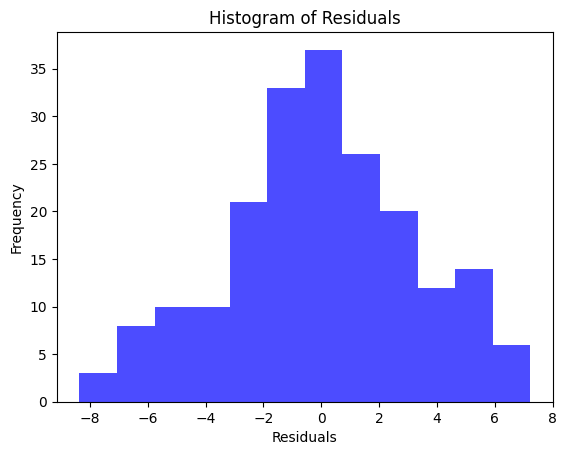

In [16]:
# Plot Histogram to visualize distribution of residuals
plt.hist(df['residuals'], bins='auto', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

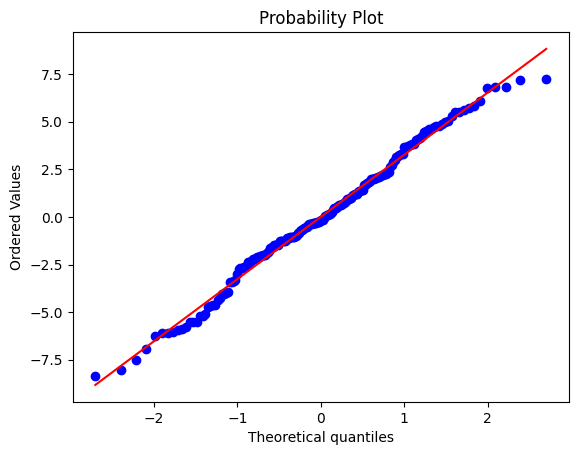

In [17]:
# Shapiro Test and Plot against normal distribution to check for equality of distribution of residuals
stats.probplot(df['residuals'], dist="norm", plot=pylab)
pylab.show()
stat, p_value = stats.shapiro(df['residuals'])

In [18]:
# Calculate Residual Sum of Squares (RSS), Total Sum of Squares (TSS), Residual Standard Error (RSE),
# and R-squared (R²)
RSS = sum(df['residuals'] ** 2)
TSS = sum((df['Sales'] - df['Sales'].mean()) ** 2)
RSE = math.sqrt(RSS / (n - 2))
R_sqr = 1 - (RSS / TSS)

In [19]:
# Print Metrics
# Note that R² is calculated and not r². In this case of a simple linear regression it can be shown
# that R² = r², thus returning a value of evaluated correlation and Accuracy of the Model
print("Mean-Squared-Error: ", MSE)
print("Root-Mean-Squared-Error: ", RMSE)
print(f'Shapiro-Wilk: {stat}, p: {p_value}')
print("Residual Standard Error: ", RSE)
print("Total Sum of Squares: ", TSS)
print("R²: ", R_sqr)

Mean-Squared-Error:  10.42699755713658
Root-Mean-Squared-Error:  3.229086179886901
Shapiro-Wilk: 0.9906851053237915, p: 0.2244940549135208
Residual Standard Error:  3.2587190986247814
Total Sum of Squares:  5417.148749999997
R²:  0.6118601076957876
